In [13]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt

df = pd.read_csv("combined_data.csv")

# Time-Based Crimes

##### Crimes per Year


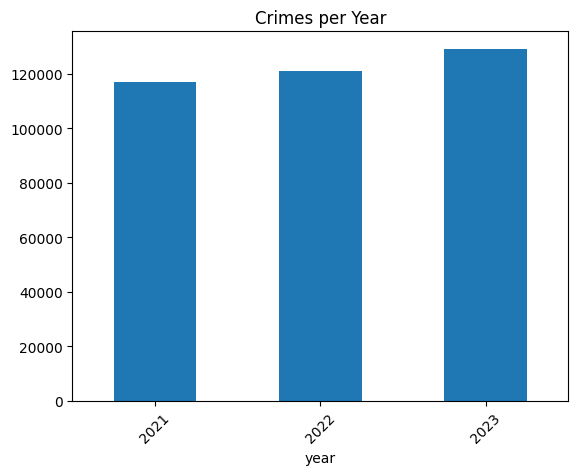

In [14]:
df['year'].value_counts().sort_index().plot(kind='bar', title='Crimes per Year')
plt.xticks(rotation=45)
plt.show()

##### Crimes per month

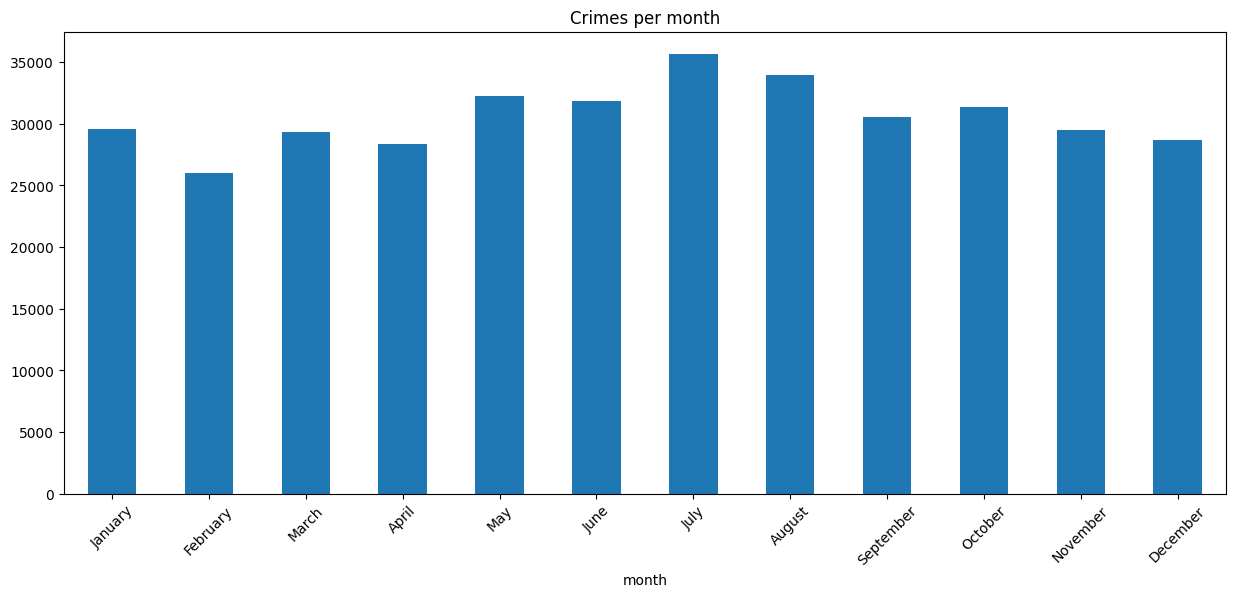

In [15]:
#Counts all months (in integer) then sorts by ascending
month_counts = df['month'].value_counts().sort_index()
month_names = [calendar.month_name[i] for i in month_counts.index]
month_counts.plot(kind='bar', figsize = (15, 6), title='Crimes per month')

#this rearranges the labels in 45 degrees
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.show()

##### Crimes by Day of Month

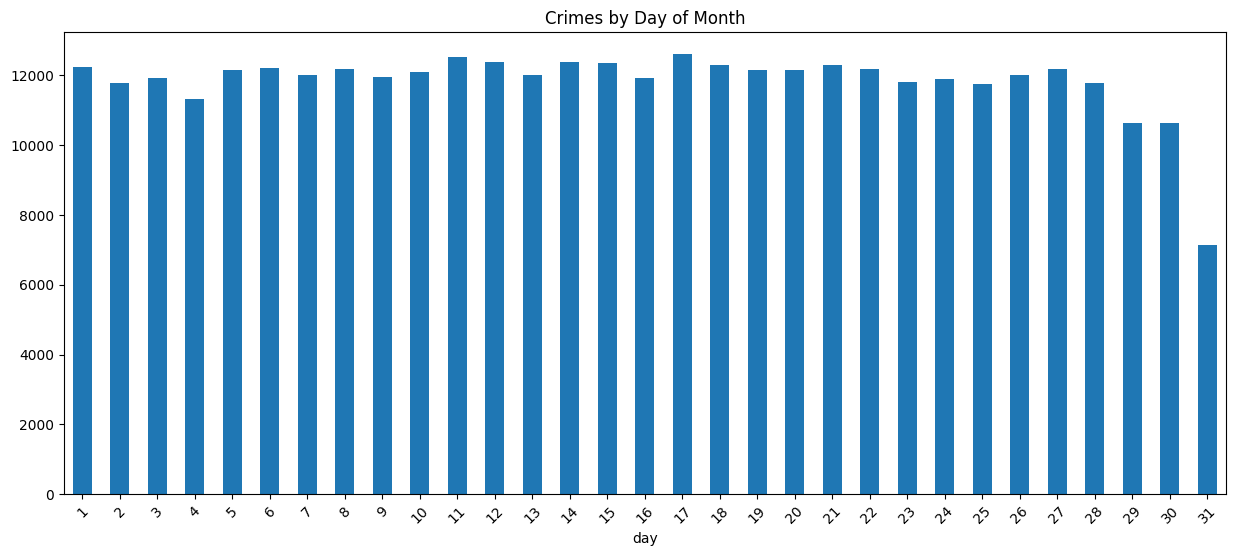

In [16]:
df['day'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6), title='Crimes by Day of Month')
plt.xticks(rotation=45)
plt.show()

##### Crimes by Hour

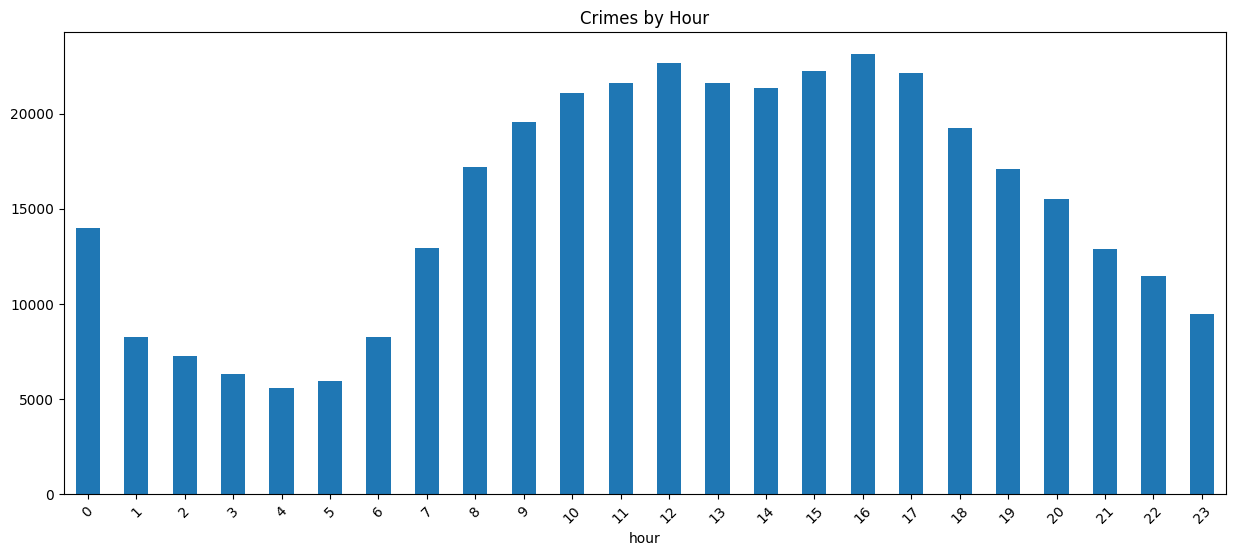

In [17]:
df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(15,6), title='Crimes by Hour')
plt.xticks(rotation=45)
plt.show()


##### Crimes by Day of Week

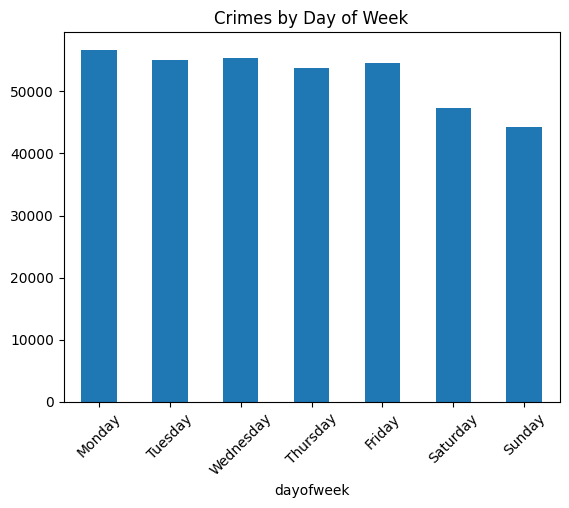

In [18]:
day_labels = list(calendar.day_name)  # ['Monday', ..., 'Sunday']

(
    df['dayofweek']
    .map(dict(enumerate(day_labels)))
    .value_counts()
    .loc[day_labels]
    .plot(kind='bar', title='Crimes by Day of Week')
)
plt.xticks(rotation=45)
plt.show()

# Location-based Crimes


##### Crimes by City

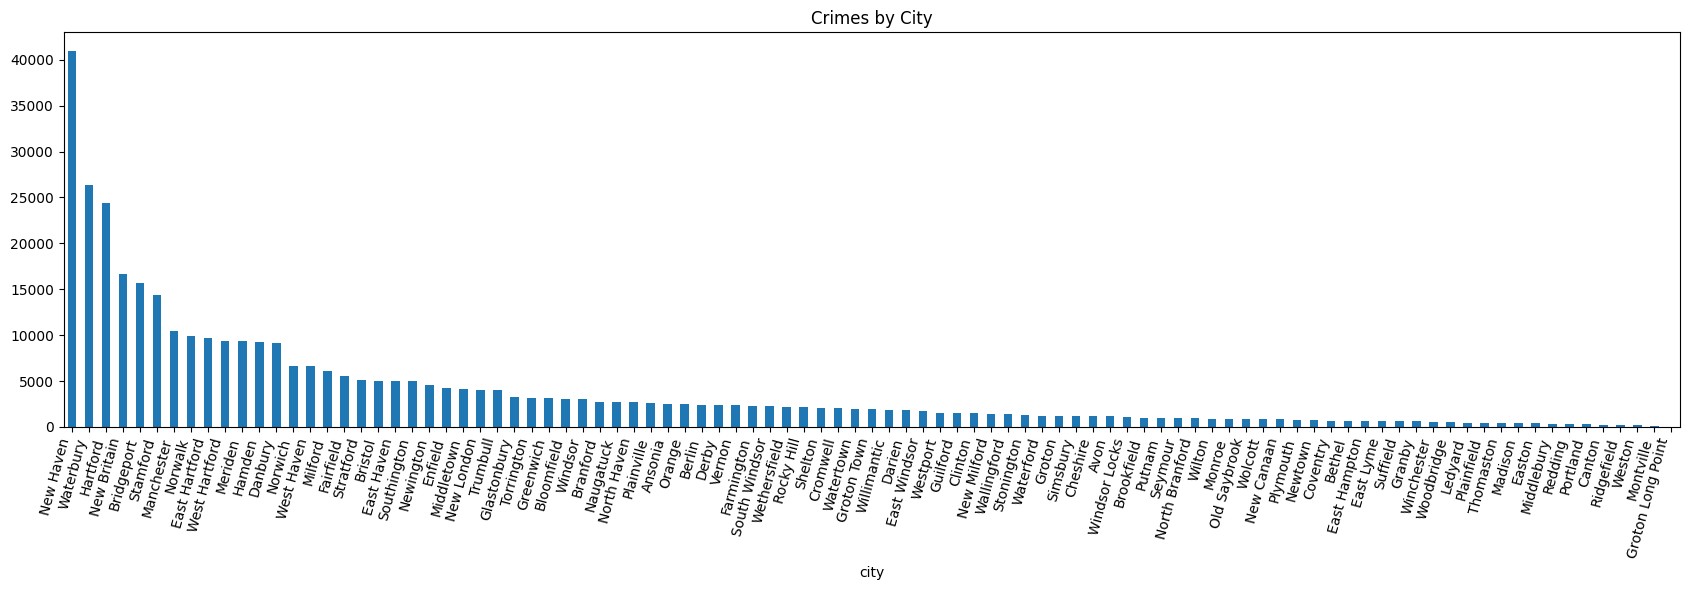

In [19]:
df['city'].value_counts().plot(kind='bar', figsize=(17, 6), title='Crimes by City')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

##### Crimes by Location Area

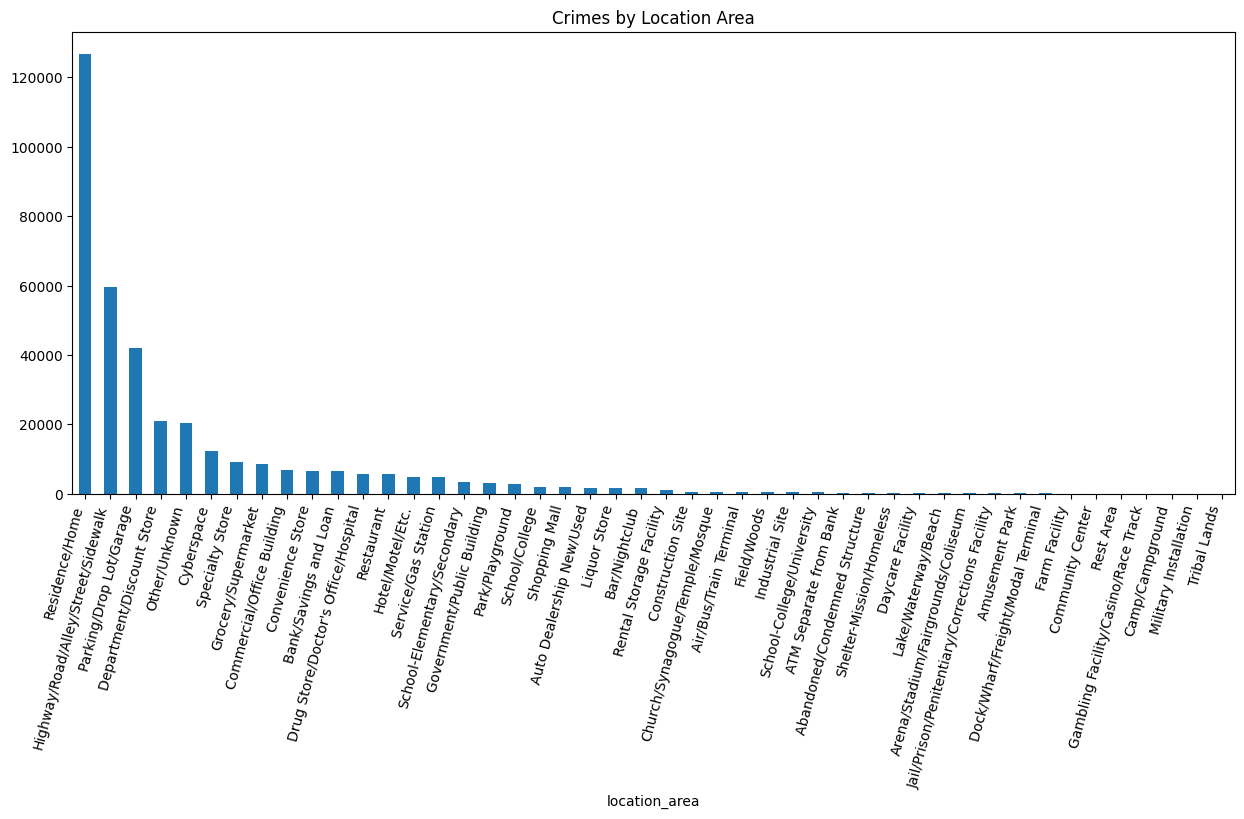

In [20]:
df['location_area'].value_counts().plot(kind='bar', figsize=(15, 6), title='Crimes by Location Area')
plt.xticks(rotation=75, ha = 'right')
plt.show()


# Target Variable: 'Crimes by Offense Type'

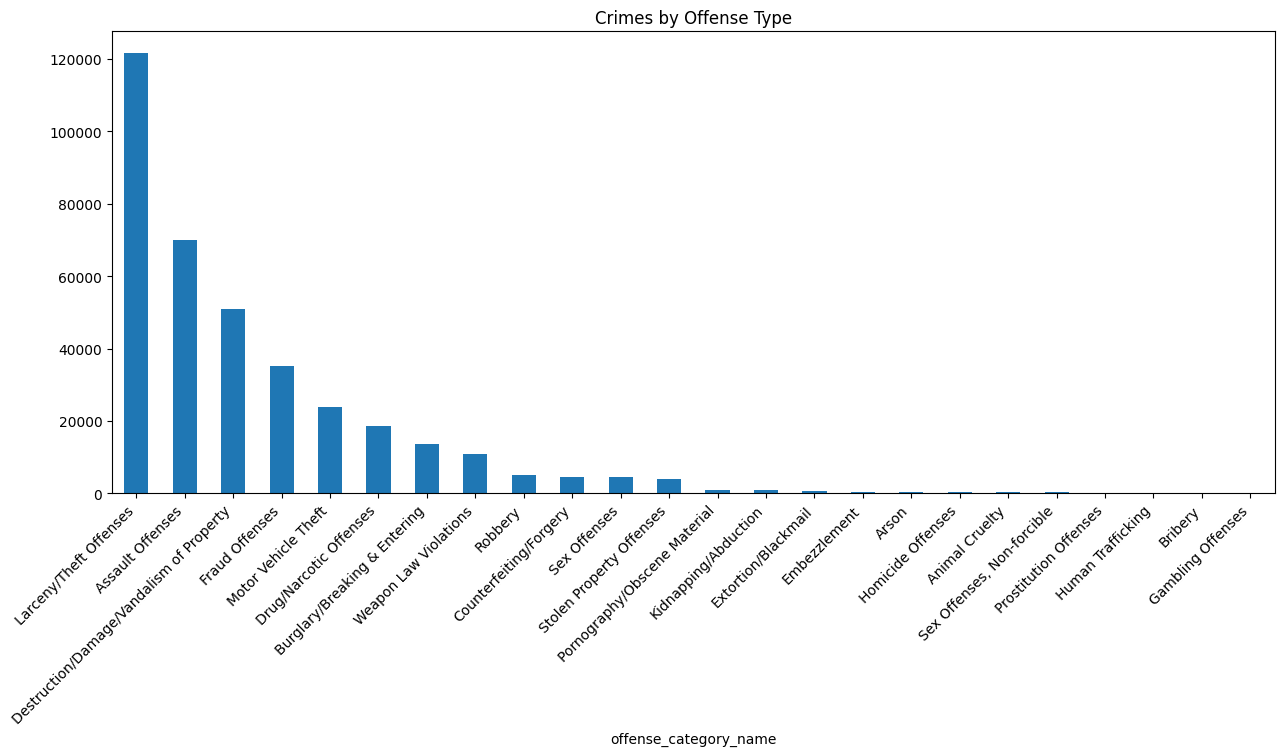

In [21]:
df['offense_category_name'].value_counts().plot(kind='bar', figsize=(15,6),title='Crimes by Offense Type')
plt.xticks(rotation=45, ha='right')
plt.show()

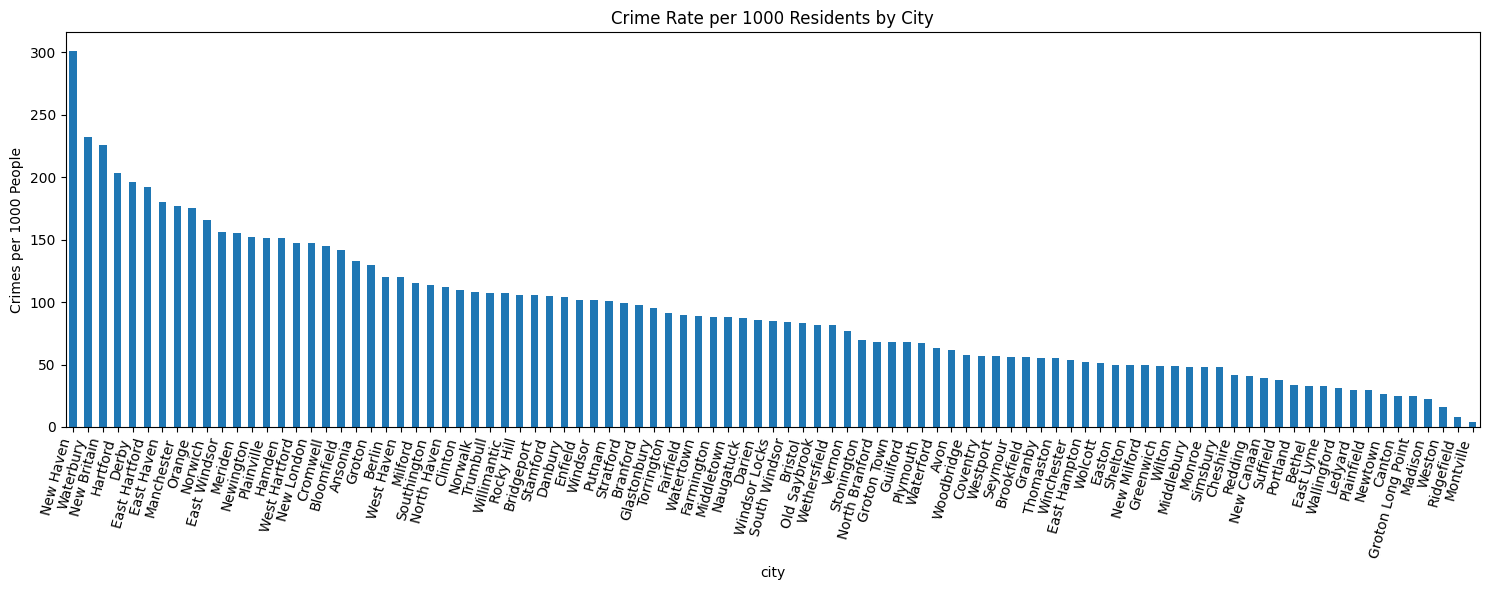

In [22]:
city_rates = df[['city', 'crime_rate_per_1000_people']].drop_duplicates().sort_values('crime_rate_per_1000_people', ascending=False)

# Plot
city_rates.set_index('city').plot(kind='bar', figsize=(15, 6), legend=False, title='Crime Rate per 1000 Residents by City')
plt.ylabel('Crimes per 1000 People')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

##### Idea: Offense type by city

In [23]:
df['offense_category_name'] = df['offense_category_name'].replace(
    {'Sex Offense': 'Sex Offenses'}
)
df.to_csv("combined_data.csv", index=False)



In [24]:
df

,year,month,day,hour,date,dayofweek,city,population,offense_name,offense_category_name,location_area,crime_rate_per_1000_people
0,2022,9,22,13,2022-09-22,3,Berlin,20109,Drug/Narcotic Violations,Drug/Narcotic Offenses,Abandoned/Condemned Structure,120
1,2022,6,4,20,2022-06-04,5,Norwich,40096,Weapon Law Violations,Weapon Law Violations,Abandoned/Condemned Structure,166
2,2022,7,10,20,2022-07-10,6,Norwich,40096,Drug/Narcotic Violations,Drug/Narcotic Offenses,Abandoned/Condemned Structure,166
3,2022,7,10,20,2022-07-10,6,Norwich,40096,Drug Equipment Violations,Drug/Narcotic Offenses,Abandoned/Condemned Structure,166
4,2022,10,14,13,2022-10-14,4,Bridgeport,148395,Drug/Narcotic Violations,Drug/Narcotic Offenses,Abandoned/Condemned Structure,106
...,...,...,...,...,...,...,...,...,...,...,...,...
366985,2021,3,13,16,2021-03-13,5,Stratford,51683,Intimidation,Assault Offenses,Other/Unknown,99
366986,2021,9,5,17,2021-09-05,6,Stratford,51683,Intimidation,Assault Offenses,Other/Unknown,99
366987,2021,12,3,14,2021-12-03,4,Stratford,51683,All Other Larceny,Larceny/Theft Offenses,Other/Unknown,99
366988,2021,10,27,11,2021-10-27,2,Stratford,51683,All Other Larceny,Larceny/Theft Offenses,Other/Unknown,99
